# Solow Model

This notebook writes a simple class to implement the Solow model.



## What's a Class?

In Python, a class is a blueprint for creating objects. It encapsulates data for the object and methods to manipulate that data. Here's a simple example to illustrate what a class looks like in Python:

In [11]:
class MyClass:
    def __init__(self, name):
        self.name = name  # Instance variable

    def greet(self):
        print(f"Welcome to {self.name}")

# Creating an instance of MyClass
my_object = MyClass("Intermediate Macroeconomics")

# Calling a method on the instance
my_object.greet()

Welcome to  Intermediate Macroeconomics


In this example:
- `MyClass` is the name of the class.
- The `__init__` method is a special method called a constructor, which is automatically called when a new object is created. It initializes the object's attributes.
- `self` represents the instance of the class and is used to access the object's attributes and methods.
- `name` is a parameter passed to the constructor, which is then set as an instance variable.

## What's a solow model

The Solow growth model is a neoclassical growth model in which the per capita capital stock 
 evolves according to the rule (**law of motion**)

$$
k_{t+1}=\frac{szk_t^\alpha+(1-\delta)k_t}{1+n}
$$


### Here:

+ $s$ is an exogenously given saving rate
+ $z$ is a productivity parameter
+ $\alpha$ is capital's share of income
+ $n$ is the population growth
+ $\delta$ is the depreciation rate

### Steady state

A steady state here is a level of capital $k$ such that $$ k_t = k_{t+1}=k$$

## Build the model 

Here's a class that implements this model.

Some points of interest in the code are:

- An instance maintains a record of its current capital stock in the variable `self.k`.
- The `h` method implements **the right-hand side of law of motion**.
- The `update` method uses `h` to update capital 
- Notice how inside `update`, the reference to the local method `h` is `self.h`.
- The methods `steady_state` and `generate_sequence` are fairly self-explanatory.

In [12]:
class Solow:
    """
    Implements the Solow growth model with the update rule

        k_{t+1} = [(s z k^α_t) + (1 - δ)k_t] /(1 + n)

    """
    def __init__(self, n=0.05,  # population growth rate
                       s=0.25,  # savings rate
                       δ=0.1,   # depreciation rate
                       α=0.3,   # share of labor
                       z=2.0,   # productivity
                       k=1.0):  # current capital stock
        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k

    def h(self):
        "Evaluate the right hand side of law of motion for capital"
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Apply the update rule
        return (s * z * self.k**α + (1 - δ) * self.k) / (1 + n)

    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k =  self.h()

    def steady_state(self):
        "Compute the steady state value of capital."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Compute and return steady state
        return ((s * z) / (n + δ))**(1 / (1 - α))

    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

Here’s a little program that uses the class to compute time series from two different initial conditions.

The common steady state is also plotted for comparison

In [13]:
import matplotlib.pyplot as plt

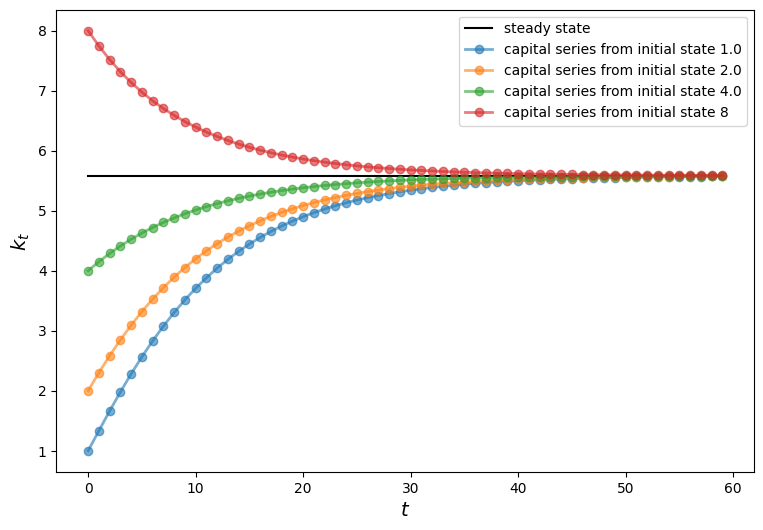

In [14]:
s1 = Solow()
s2 = Solow(k=2.0)
s3= Solow(k=4.0)
s4=Solow(k=8)

T = 60
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')

# Plot time series for each economy
for s in s1, s2, s3, s4:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

This work is based in part on material under the **Creative Commons Attribution-ShareAlike 4.0 International License**.

- **Original author**: Thomas J. Sargent and John Stachurski
- **Title of work**: Python Programming for Economics and Finance
- **License link**: [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)